In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/water_quality_.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,11.168946,77.488213,4.708658,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3114 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.shape

(3276, 9)

In [ ]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,True,False,False
3273,False,False,False,False,True,False,False,False,False
3274,False,False,False,False,True,False,False,False,False


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Check                0
dtype: int64

In [ ]:
df["ph"].fillna("7", inplace = True)
df["Sulfate"].fillna("333", inplace = True)
df["Trihalomethanes"].fillna("66", inplace = True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64

<ipython-input-9-ad80084067c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

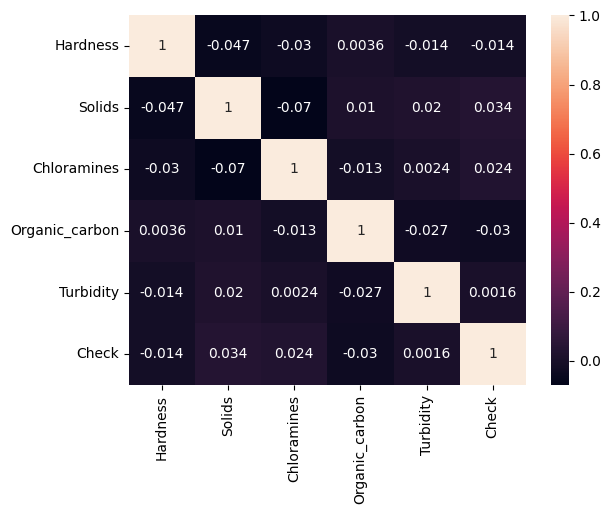

In [ ]:
sns.heatmap(df.corr(),annot = True)
sns

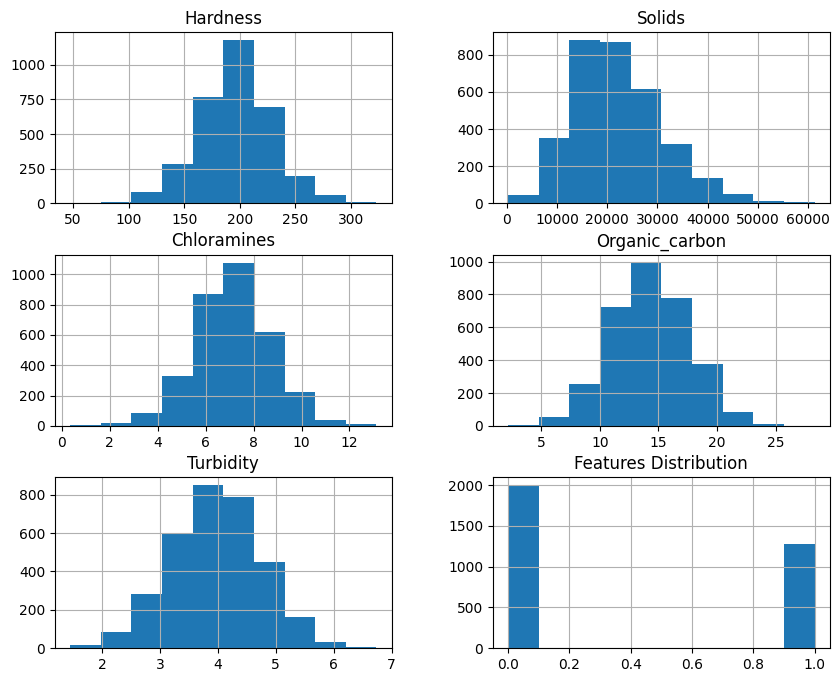

In [ ]:
df.hist(figsize=(10,8),bins = 10)
plt.title("Features Distribution")
plt.show()

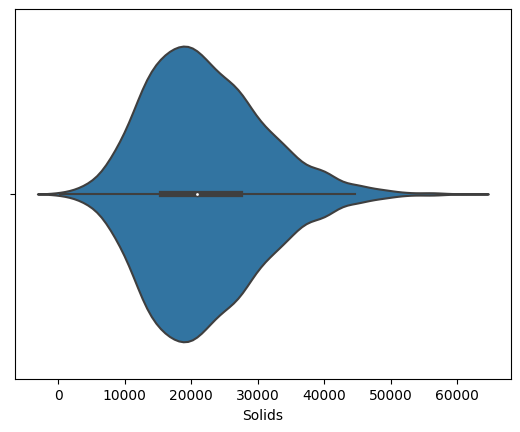

In [ ]:
sns.violinplot(x='Solids', data=df)
plt.show()

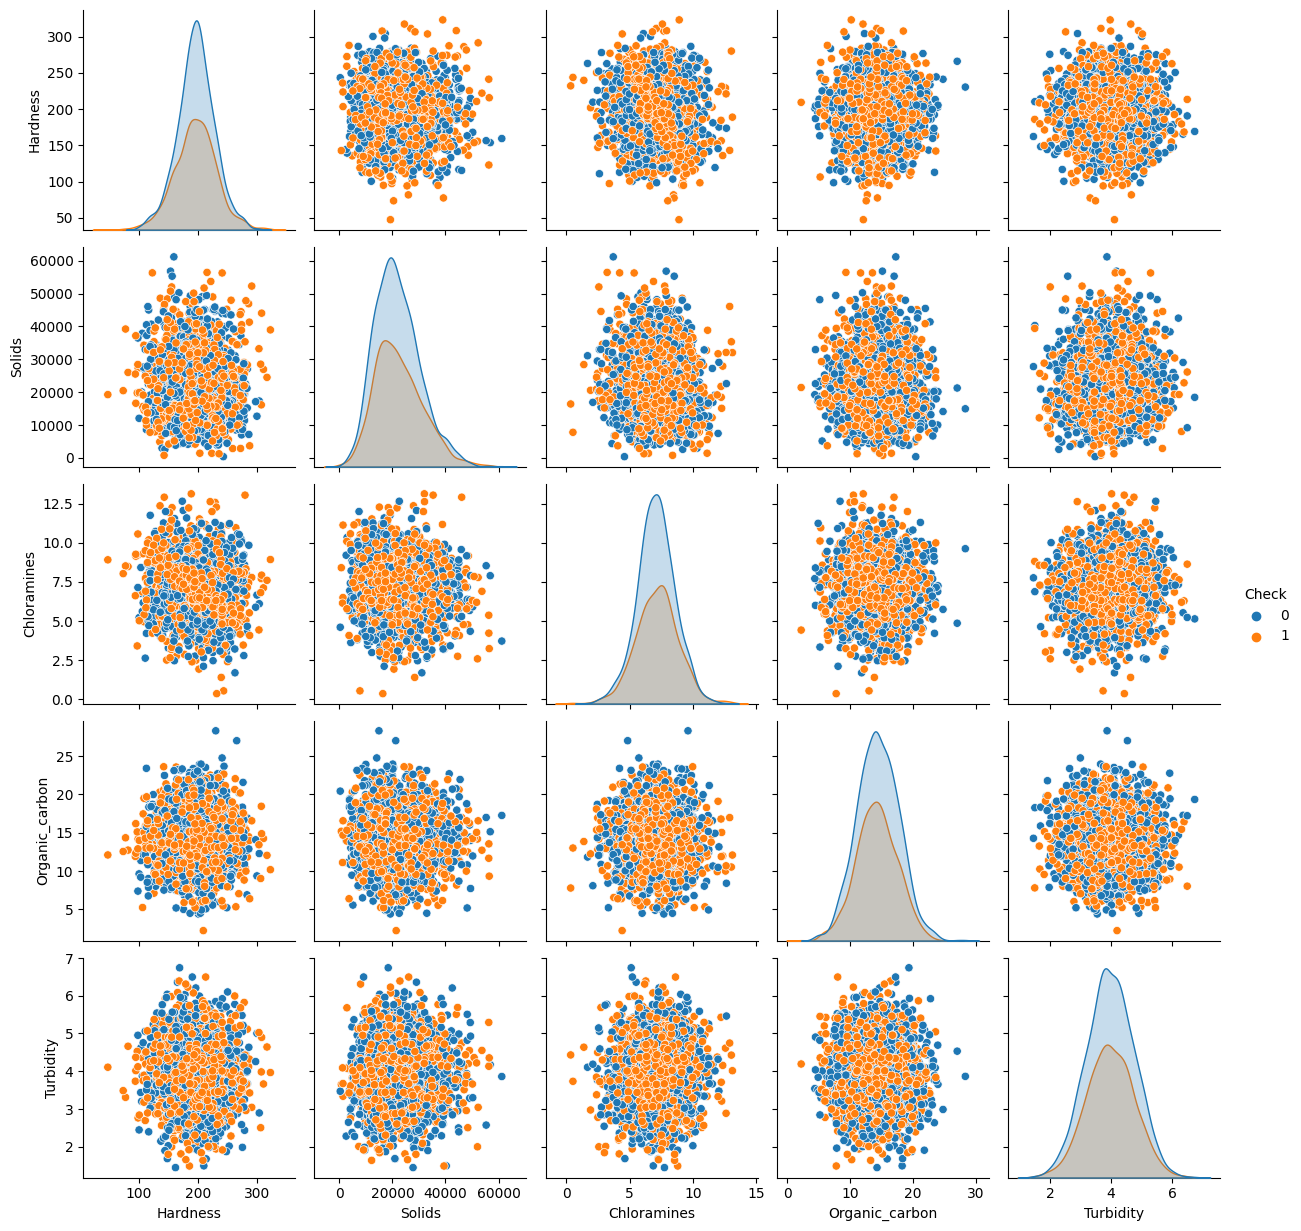

In [ ]:
sns.pairplot(df, hue='Check')
plt.show()

<ipython-input-40-5897707f0316>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hardness'])


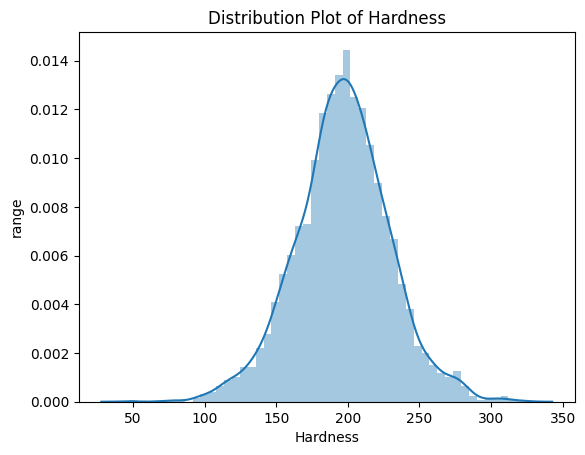

In [40]:
sns.distplot(df['Hardness'])
plt.xlabel('Hardness')
plt.ylabel('range')
plt.title('Distribution Plot of Hardness')
plt.show()

In [ ]:
g=df['Sulfate'].value_counts()
g

333            781
280.7456229      1
332.7445192      1
391.9182286      1
330.9053704      1
              ... 
343.6208232      1
359.7105172      1
389.2195856      1
337.2314685      1
359.9485744      1
Name: Sulfate, Length: 2496, dtype: int64

In [35]:
b=df['Chloramines'].value_counts()
b

7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: Chloramines, Length: 3276, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdda25e82e0>,
 [Text(0.231747161621997, 1.0753107704659841, 'Sulfate'),
  Text(-0.23174706094413614, -1.0753107921637144, 'Chloramines')])

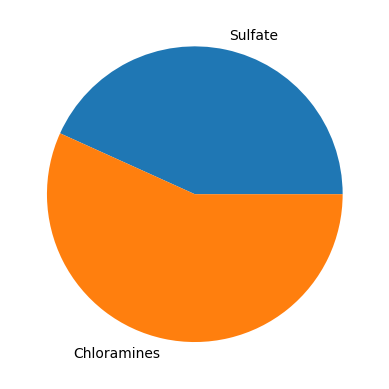

In [36]:
h=[2496,3276]
labels=('Sulfate','Chloramines')

plt.pie(h,labels=labels)

In [ ]:
x=df[["ph","Hardness","Solids","Chloramines","Sulfate","Organic_carbon","Trihalomethanes","Turbidity"]]
y=df[["Check"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [ ]:
model_params={
    'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[10,20,30,40],
            'kernel':['rbf','linear']
        }
    },
    'randomforest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,2,3,5]
        }
    },
    'decisiontree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy','gini']
        }
    },
    'naivebayes':{
        'model':GaussianNB(),
        'params':{}
        }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name,mp in model_params.items():
    GS=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    GS.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':GS.best_score_,
        'best_params':GS.best_params_
})

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [21]:
print(scores)

[{'model': 'SVM', 'best_score': 0.609890150809905, 'best_params': {'C': 10, 'kernel': 'rbf'}}, {'model': 'randomforest', 'best_score': 0.5998207968720909, 'best_params': {'n_estimators': 2}}, {'model': 'decisiontree', 'best_score': 0.5772346862781604, 'best_params': {'criterion': 'gini'}}, {'model': 'naivebayes', 'best_score': 0.613250325823869, 'best_params': {}}]


In [22]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb=nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [24]:
y_test

,Check
1869,0
2097,0
2275,0
2969,0
508,0
...,...
1236,0
241,0
2523,0
1645,0


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
print(accuracy_score(y_test,y_pred))

0.6280487804878049


In [28]:
print(confusion_matrix(y_pred,y_test))

[[188  93]
 [ 29  18]]


In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       281
           1       0.16      0.38      0.23        47

    accuracy                           0.63       328
   macro avg       0.51      0.53      0.49       328
weighted avg       0.77      0.63      0.68       328



In [34]:
a= int(input("pH : "))
b= int(input("Turbidity : "))
c= int(input("Sulfate : "))
d= int(input("Solids : "))
e= int(input("Hardness : "))
f= int(input("Chloramines : "))
g= int(input("Trihalomethanes : "))
h= int(input("Organic_carbon : "))

score= ([[a,b,c,d,e,f,g,h]])
nb.predict(score)

pH24
Turbidity16
Sulfate9
Solids12
Hardness5
Chloramines8
Trihalomethanes3
Organic_carbon16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])